## Find best model

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data = pd.read_csv('../data/fullData.csv')
data.head()

,Код объекта,трассы,автомобильные мосты,гостевой паркинг,памятники архитектуры,культуры,пешеходные бульвары,всего этажей,Общая площадь,Высота потолков,...,Двор_закрытый двор,Двор_открытый двор,Ремонт_Косметический ремонт,Ремонт_Ремонт по дизайн проекту,Ремонт_Современный ремонт,Ремонт_Требует ремонта,Ремонт_Улучшенная черновая отделка,Ремонт_Частичный ремонт,Ремонт_Черновая отделка,цена
0,5757236,0,0,0,0,0,0,5,30.60,2.50,...,0,1,0,0,0,0,1,0,0,2390.0
1,5535905,0,0,1,0,0,0,5,18.00,2.55,...,0,1,1,0,0,0,0,0,0,920.0
2,4644398,0,0,1,0,0,0,5,57.83,2.70,...,1,0,0,0,0,0,1,0,0,3250.0
3,5667276,0,0,0,0,0,0,16,41.20,2.70,...,0,1,1,0,0,0,0,0,0,3590.0
4,4644417,0,0,1,0,0,0,5,84.00,2.70,...,1,0,0,0,0,0,1,0,0,4500.0


In [5]:
X = data.drop(columns='цена')
Y = data['цена']

In [6]:
# gridsearch for DecisionTree
estimator = DecisionTreeRegressor()
params = {'max_depth': [None,3,4,5,6,7,8,9,10,15,17,20],
         'min_samples_split':[n for n in range(2,10)],
          'min_samples_leaf' : [i for i in range(1,10)],
          'random_state' : [42],
         'min_samples_leaf': [n for n in range(1,10)],
         'max_features':[n_features/10 for n_features in range(1,11)]}

In [7]:
grid = GridSearchCV(estimator, params, verbose=True)

In [8]:
grid.fit(X, Y)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17,
                                       20],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [42]},
             verbose=True)

In [9]:
best_params = grid.best_params_
best_params

{'max_depth': 6,
 'max_features': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 42}

In [10]:
model = DecisionTreeRegressor(**best_params)

In [11]:
score = cross_val_score(model, X, Y, cv=5)
score.mean()

0.7884118840013705

In [12]:
X

,Код объекта,трассы,автомобильные мосты,гостевой паркинг,памятники архитектуры,культуры,пешеходные бульвары,всего этажей,Общая площадь,Высота потолков,...,"Год постройки_(1999.25, 2021.0]",Двор_закрытый двор,Двор_открытый двор,Ремонт_Косметический ремонт,Ремонт_Ремонт по дизайн проекту,Ремонт_Современный ремонт,Ремонт_Требует ремонта,Ремонт_Улучшенная черновая отделка,Ремонт_Частичный ремонт,Ремонт_Черновая отделка
0,5757236,0,0,0,0,0,0,5,30.60,2.50,...,1,0,1,0,0,0,0,1,0,0
1,5535905,0,0,1,0,0,0,5,18.00,2.55,...,0,0,1,1,0,0,0,0,0,0
2,4644398,0,0,1,0,0,0,5,57.83,2.70,...,1,1,0,0,0,0,0,1,0,0
3,5667276,0,0,0,0,0,0,16,41.20,2.70,...,1,0,1,1,0,0,0,0,0,0
4,4644417,0,0,1,0,0,0,5,84.00,2.70,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2891833,0,0,0,0,0,0,9,39.80,2.50,...,0,0,1,0,0,1,0,0,0,0
575,4671111,0,0,0,0,0,0,5,36.60,2.50,...,1,0,1,1,0,0,0,0,0,0
576,5193363,0,0,0,0,0,0,5,30.60,2.50,...,0,0,1,1,0,0,0,0,0,0
577,2836807,0,0,0,0,0,0,9,51.00,2.50,...,1,0,1,0,0,1,0,0,0,0


In [13]:
preds = cross_val_predict(model, X, Y, cv=5)

In [14]:
mean_squared_error(preds, Y)

472959.9084812822

In [15]:
mean_absolute_error(preds, Y)

480.50977094044276

In [16]:
residuals = preds - Y

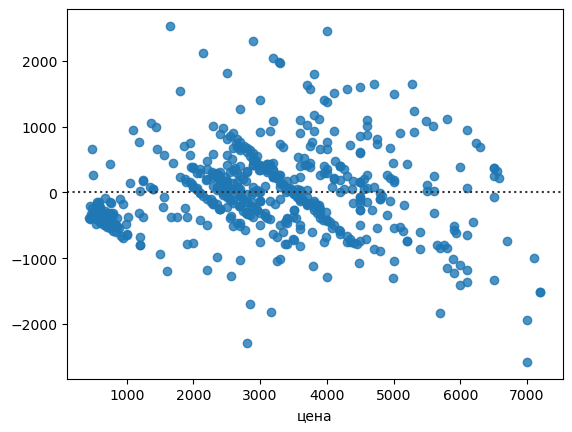

In [17]:
graph = sns.residplot(x=Y, y=preds)

Text(0.5, 9.444444444444438, 'residuals')

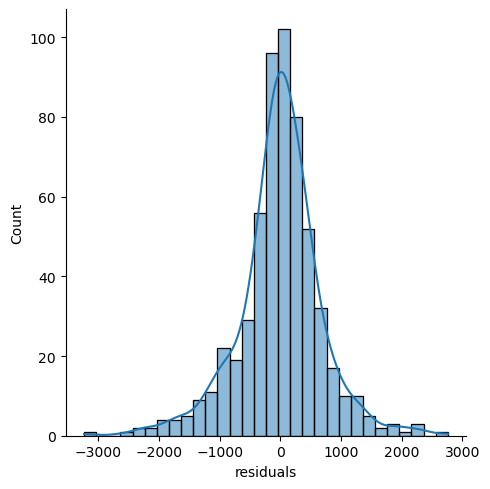

In [18]:
sns.displot(residuals, bins=30, kde=True)
plt.xlabel('residuals')

In [19]:
Y.iloc[:25]

0     2390.0
1      920.0
2     3250.0
3     3590.0
4     4500.0
5     2550.0
6     3000.0
7      800.0
8     4700.0
9     2970.0
10    4000.0
11    2450.0
12     570.0
13    4200.0
14    1190.0
15    2700.0
16    1999.0
17    3200.0
18    5500.0
19     649.0
20    4000.0
21    2350.0
22     590.0
23     700.0
24     990.0
Name: цена, dtype: float64

In [20]:
preds[:25]

array([2760.30769231,  609.14285714, 3425.        , 2947.5       ,
       5108.66666667, 3487.25      , 3399.17105263,  854.6       ,
       6066.66666667, 3399.17105263, 4499.21428571, 2541.70689655,
        609.14285714, 4011.47368421, 2254.82142857, 2541.70689655,
       1403.33333333, 3399.17105263, 5108.66666667,  672.5       ,
       3399.17105263, 2760.30769231,  854.6       ,  725.        ,
        854.6       ])

## Checking dummmy predictions
predict price based on flat_type

In [23]:
X.columns

Index(['Код объекта', 'трассы', 'автомобильные мосты', 'гостевой паркинг',
       'памятники архитектуры', 'культуры', 'пешеходные бульвары',
       'всего этажей', 'Общая площадь', 'Высота потолков', 'Комнатность',
       'подземный паркинг', 'Материал окон_Деревянные',
       'Материал окон_Пластиковые', 'Материал окон_Пластиковые/деревянные',
       'Счетчик воды_есть', 'Счетчик воды_отсутствует',
       'Балкон_Балкон и лоджия', 'Балкон_Два балкона и более',
       'Балкон_Есть балкон', 'Балкон_Лоджия', 'Балкон_Нет балкона',
       'Серия_1-335', 'Серия_1-335А', 'Серия_2-68-1-0', 'Серия_335-с',
       'Серия_75 ', 'Серия_75.1, 3-75', 'Серия_А-1', 'Серия_Бреж', 'Серия_Инд',
       'Серия_Общ', 'Серия_Хрущ', 'Стены_Блочные', 'Стены_Деревянные',
       'Стены_Кирпичные', 'Стены_Монолитные', 'Стены_Панельные',
       'Адрес_Голиковка', 'Адрес_Древлянка', 'Адрес_Зарека', 'Адрес_Ключевая',
       'Адрес_Кукковка', 'Адрес_Октябрьский', 'Адрес_Первомайский',
       'Адрес_Перевалка', 'Адре

In [21]:
means = X.join(Y).groupby('Серия')['цена'].mean()
means

KeyError: 'Серия'

In [ ]:
dummy_preds = X['Серия'].transform(lambda x: means[x]).values

In [ ]:
mean_squared_error(dummy_preds,Y)

In [ ]:
mean_absolute_error(dummy_preds,Y)

In [ ]:
graph = sns.residplot(x=dummy_preds, y=Y)


In [ ]:
residuals_dummy = dummy_preds - Y

In [ ]:
sns.displot(residuals_dummy, bins=30, kde=True)
plt.xlabel('residuals')

### models performs better then dummy regressor
I conclude that model works

## Save model parameters

In [ ]:
model.get_params()

In [ ]:
import pickle

In [ ]:
model.fit(X, Y)

In [103]:
#with open("model.pkl", "wb") as f:
#    pickle.dump(model, f)

In [104]:
#with open("model.pkl", "rb") as f:
#    derevo = pickle.load(f)